In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Decision Tree

If you have an engineering background, then you already know what is a **decision tree**. It is a tree, that makes decisions. Duuh! :D

Where every node is a **Yes/No question** and the branches are the answers to these questions.

<center><img src="img/decision_tree_1.png" alt="What is a decision tree?" width="650" height="231" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 1.</b> Decision tree is a Yes/No tree</i></p>


A Decision Tree helps us to make decisions by mapping out different choices and their possible outcomes. The really interesting part is how we build a **decision tree** from a dataset. And we will demonstrate this in current notebook.


### Decision Tree Types
There are mainly two types of Decision Trees based on the target variable:

* **Classification Trees**: Used for predicting **categorical** outcomes like spam or not spam. These trees split the data based on features to classify data into predefined categories.
* **Regression Trees**: Used for predicting **continuous** outcomes like predicting house prices. Instead of assigning categories, it provides numerical predictions based on the input features.

# Regression Tree

In this assignment, we will be implementing a regression tree from scratch. Its purpose would be to predict an ML engineer monthly salary, based on her *years of experience* and *level of education*.

In [2]:
   def get_data() -> tuple[np.ndarray, np.ndarray]:
        '''
        Sample data about ML engineers monthly salaries.

        Returns:
            X -> np.ndarray     : input features (years of experience, level of education)
            Y -> np.ndarray     : target variable (salary)
        '''
        # X1 = years of experience
        X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
        # X2 = level of education 
        X2 = [2, 5, 3, 5, 3, 4, 2, 3, 4, 4, 3, 7, 5, 6, 5, 5, 2, 3, 4, 5, 6, 7, 5, 3, 2, 4, 5, 7, 3, 5, 7, 7, 5]
        # Y = salary
        Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]
        # Merge the input features into a single array
        X = np.column_stack((X1, X2))

        return X, np.array(Y)

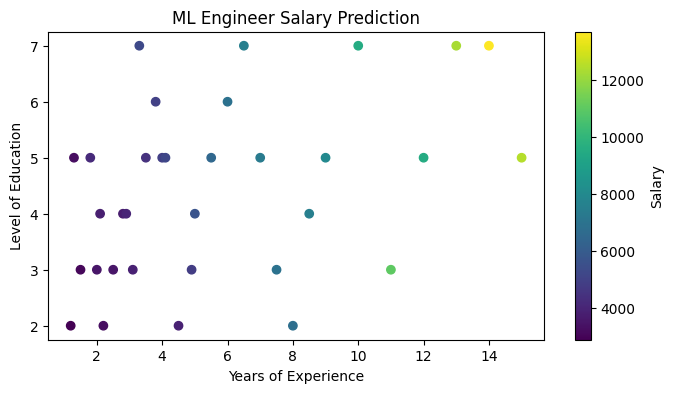

In [3]:
X, Y = get_data()
# Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('Years of Experience')
plt.ylabel('Level of Education')
plt.title('ML Engineer Salary Prediction')
plt.colorbar(label='Salary')
plt.show()

So, we will have to create a decision tree with nodes like *"Do you have more than 10 years of experiences?"* -> *"Is your level of education 6 or higher?"* -> etc.

So, we will need a **Node** class for sure.

### Node

In [4]:
class Node():
    def __init__(self,
    feature_index: int = None,
    threshold: float = None,
    var_red: float = None,
    left: 'Node' = None,
    right: 'Node' = None,
    value: float = None):
        '''
        Constructor for the Node class.

        Args:
            feature_index (int):    The index of the feature to split on.
            threshold (float):      The threshold value to split on.
            var_red (float):        The variance reduction achieved by the split.
            left (Node):            The left child node.
            right (Node):           The right child node.
            value (float):          The value of the node (in case of a leaf node).
        ''' 
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.var_red = var_red
        self.left = left
        self.right = right
        
        # for leaf node
        self.value = value

### How to split the data?

Regression trees aim to **split the dataset** into smaller subsets, making the predictions in each subset as **homogeneous (as close to other values)** as possible in terms of the target variable. Here’s how it works:

**Choosing the Best Split:**

* The algorithm evaluates **all possible splits** for each feature and selects **the one that minimizes the variance** in the target variable within the subsets. To choose the best split, the concept of **variance reduction** is used.
* This splitting continues **recursively** until the stopping criteria are met, such as reaching a maximum depth or a minimum number of samples per leaf.

<center><img src="img/regression_tree_1.png" alt="How to split decision trees?" width="522" height="651" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 2.</b> Which split is better?</i></p>


To select a split we need to calculate the **variance reduction** for each of the two split candidates.

#### Variance Reduction

The variance reduction formula is simple :

$$ \text{Variance Reduction} =  Var(root) - \sum{w_i} \times Var(child)$$
$$ \text{where } w_i \text{ is the weight for each child variance: } \frac{\text{node data points}}{\text{all data points}} $$

$$Var(root) = \frac{1}{n} \times \sum{(y_i - \hat{y})^2}$$
$$\text{where } \hat{y} \text{ is the average of the sample} = 50K$$

$$Var(root) = \frac{1}{5} \times \left( (40-50)^2 + (42-50)^2 + (52-50)^2 + (60-50)^2 + (56-50)^2 \right) = 60.8$$
$$Var(C1) = \frac{1}{1} \times \left( (40-50)^2 \right) = 100$$
$$Var(C2) = \frac{1}{4} \times \left( (42-50)^2 + (52-50)^2 + (60-50)^2 + (56-50)^2 \right) = 51$$
$$Var(C3) = \frac{1}{2} \times \left( (40-50)^2 + (42-50)^2 \right) = 82$$
$$Var(C4) = \frac{1}{3} \times \left( (52-50)^2 + (60-50)^2 + (56-50)^2 \right) = 46.67$$

So, the variance reductions for these two splits are:

$$ VR(Split1) = 60.8 - [\frac{1}{5} \times 100 + \frac{4}{5} \times 51] = 0 $$
$$ VR(Split2) = 60.8 - [\frac{2}{5} \times 82 + \frac{3}{5} \times 46.67] = 0.304$$

**The split whose variance reduction is higher will be chosen.**

Since here variance reduction of split2 is more than that of split1, we will go with split2.

**Predict**

Now, lets say we want to predict the income of the person whose experience is $3$, then the answer will be the avg of values present in the leaf node which will be $(52+60+56)/3 = 56K$.

#### Information Gain
**Information gain** measures the reduction in variance (impurity) after a dataset is split based on an attribute. A high information gain indicates that the attribute has effectively split the data into pure subsets. In other words, information gain measures the **quality of a split**. Information gain could also be used for **feature selection**, by evaluating the gain of each input variable in the context of the target variable.

Having above example, we can now build our tree.

### Tree

In [ ]:
class RegressionTree():
    def __init__(self, min_samples_split: int = 2, max_depth: int = 3):
        '''
        Constructor for the RegressionTree class.

        Args:
            min_samples_split (int): The minimum number of samples required to split an internal node.
            max_depth (int):         The maximum depth of the tree.
        '''
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def build_tree(self, dataset: np.ndarray, curr_depth: int = 0) -> Node:
        '''
        Build the decision tree recursively.

        Args:
            dataset (np.ndarray):   The dataset to build the tree on.
            curr_depth (int):       The current depth of the tree.

        Returns:
            Node: The root node of the tree.
        '''
        # Split the dataset into features and target variable
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}

        # Split until stopping conditions are met (pre-pruning criteria):
        # 1. Minimum number of samples to split an internal node
        # 2. Maximum depth of the tree
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"] > 0:
                # Recursively build the left subtree
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # Recursively build the right subtree
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # Return the new decision node (root node for the new subtree)
                return Node(best_split["feature_index"],
                            best_split["threshold"],
                            best_split["var_red"],
                            left_subtree, 
                            right_subtree)
        
        # Otherwise, compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # Return the leaf node
        return Node(value=leaf_value)

    def get_best_split(self, 
            dataset: np.ndarray, 
            num_samples: int, 
            num_features: int) -> dict:
        '''
        Find the best split for the dataset.

        Args:
            dataset (np.ndarray):   The dataset to find the best split on.
            num_samples (int):      The number of samples in the dataset.
            num_features (int):     The number of features in the dataset.

        Returns:
            dict: The best split.
        '''
        # Dictionary to store the best split
        best_split = {}
        # Start with an extremely small number.
        max_var_red = -float("inf")
        # Loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            # List of candidate thresholds - unique values of the feature.
            threshold_candidates = np.unique(feature_values)
            # Loop over all the feature values present in the data
            for threshold_candidate in threshold_candidates:
                # Build a candidate split.
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold_candidate)
                # If childs are not empty.
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # Then, compute the information gain of the candidate split.
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # And update the best split if needed. The best split is the one 
                    # with the highest information gain (variance reduction).
                    if curr_var_red > max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"]     = threshold_candidate
                        best_split["dataset_left"]  = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"]       = curr_var_red
                        max_var_red = curr_var_red
    
        # Return the best split (the one with the highest information gain).
        return best_split

    def split(self, 
            dataset: np.ndarray, 
            feature_index: int, 
            threshold: float) -> tuple[np.ndarray, np.ndarray]:
        '''
        Split the dataset into two subsets (candidate split) based on the feature values and threshold.

        Args:
            dataset (np.ndarray):   The dataset to split.
            feature_index (int):    The index of the feature to split on.
            threshold (float):      The threshold value to split on.

        Returns:
            tuple: The candidate split (two subsets of the dataset).
        '''
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def variance_reduction(self, 
            parent: np.ndarray, 
            l_child: np.ndarray, 
            r_child: np.ndarray) -> float:
        '''
        Compute the variance reduction of the candidate split.

        Args:
            parent (np.ndarray):    The parent dataset.
            l_child (np.ndarray):   The left child dataset.
            r_child (np.ndarray):   The right child dataset.

        Returns:
            float: The variance reduction (information gain) of the candidate split.
        '''
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction

    def calculate_leaf_value(self, Y: np.ndarray) -> float:
        '''
        Compute the leaf node value. Basically, the average of the target variable.

        Args:
            Y (np.ndarray): The target variable.
        '''
        val = np.mean(Y)
        return val

    def print_tree(self, tree = None, indent = " "):
        '''
        Recursively print the decision tree.

        Args:
            tree (Node): The root node of the tree.
            indent (str): The indentation string.
        '''
        # CASE 1: We are at root level
        if not tree:
            print("X_0 is yrs_of_XP, X_1 is education_level")
            print("------")
            tree = self.root

        # CASE 2: We are at leaf level
        if tree.value is not None:
            print(f"{tree.value:.0f}")

        # CASE 3: We are at internal node level
        else:
            var_red_str = f"{tree.var_red:.0f}"
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", var_red_str)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X: np.ndarray, Y: np.ndarray):
        '''
        Train the decision tree.

        Args:
            X (np.ndarray): The input features.
            Y (np.ndarray): The target variable.
        '''
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def make_prediction(self, x: np.ndarray, tree: Node) -> float:
        '''
        Recursively predict the target variable for a new dataset.

        Args:
            x (np.ndarray): A data point from the dataset.
            tree (Node):    The root node of the tree.
        '''
        # CASE 1: Leaf node
        if tree.value is not None: 
            return tree.value

        # CASE 2: Decision node
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            # CASE 2.1: Go down the left child
            return self.make_prediction(x, tree.left)
        else:
            # CASE 2.2: Go down the right child
            return self.make_prediction(x, tree.right)

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predict the target variable for a new dataset.

        Args:
            X (np.ndarray): All the input features from the dataset.

        Returns:
            np.ndarray:     The predicted target variable.
        '''
        # For each data point in the dataset, make a prediction.
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

Now, let's split the training data.

### Split the data

In [ ]:
def train_test_split(
    X: np.ndarray, 
    Y: np.ndarray, 
    test_size: float = 0.2) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Split the dataset into training and testing sets.

    Args:
        X (np.ndarray): The input features.
        Y (np.ndarray): The target variable.
        test_size (float): The size of the test set.

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: The training and testing sets.
    '''
    # Shuffle the dataset
    df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': Y})
    df = df.sample(frac=1).reset_index(drop=True)
    # Calculate the number of rows in the test set
    n_test_rows = int(len(df) * test_size)
    # Split the dataset
    train_df = df.iloc[:-n_test_rows]
    test_df = df.iloc[-n_test_rows:]
    return train_df, test_df

train_df, test_df = train_test_split(X, Y)
X_train, Y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values.reshape(-1,1)
X_test, Y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values.reshape(-1,1)

### Train the model

In [7]:
regression_tree = RegressionTree(min_samples_split=3, max_depth=3)
regression_tree.fit(X_train, Y_train)
regression_tree.print_tree()

X_0 is yrs_of_XP, X_1 is education_level
------
X_0 <= 5.5 ? 4875598
 left:X_0 <= 3.1 ? 680684
  left:X_0 <= 1.3 ? 85430
    left:3100
    right:X_1 <= 2.0 ? 45125
        left:3300
        right:3870
  right:X_0 <= 4.9 ? 282240
    left:X_0 <= 3.3 ? 35344
        left:5300
        right:4830
    right:6100
 right:X_0 <= 9.0 ? 3266050
  left:X_0 <= 8.0 ? 83070
    left:X_1 <= 6.0 ? 37636
        left:7015
        right:7500
    right:7750
  right:X_0 <= 12.0 ? 1382400
    left:X_1 <= 3.0 ? 500000
        left:11000
        right:9500
    right:12400


### Measure accuracy

In [9]:
Y_pred = regression_tree.predict(X_test) 
deviations = []
print("Prediction\tActual")
for idx in range(len(X_test)):
    prediction = Y_pred[idx]
    actual = Y_test[idx][0]
    print(f"{prediction:.0f}\t\t{actual}")
    deviations.append(np.abs(prediction - actual)/actual)

print(f"\nThe avg deviation of the predicted values is: {np.mean(deviations)*100:.0f}%")

Prediction	Actual
4830		3900
3870		3100
3870		3500
3870		3800
4830		5000
12400		13700

The avg deviation of the predicted values is: 12%


# Conclusion

This simple regression tree model predicts ML engineer salaries with 80-90% accuracy.